In [2]:
#author 
"shreyas raja created @time using LSTM - Sequence modelling"
import numpy as np # for calculations consisting of arrays
import pandas as pd #to load the data 
import matplotlib as mpl # to plot figures 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # done initially to eliminate the NAns from the dataset 
from sklearn.model_selection import train_test_split #to split the data into training and testing   
from keras.preprocessing.sequence import TimeseriesGenerator # sequential data processing for time series generator 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to convert the data from float to a common scale vector
from keras import metrics 
import tensorflow as tf # to describe the architecture of the neural networks 
import seaborn as sns

mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = False

In [3]:
df=pd.read_csv('Final _model_with_uniform_inleakage.csv') # reading the data with pandas 
#df['ET'] = pd.to_numeric(df['Eto'],errors = 'coerce')
df["date"] = pd.to_datetime(df["date"]) # converting it to a datetime index 
df.set_index('date',inplace=True) 
df= df.interpolate('linear') # performing linear interpolations for missing data points
df['Inleakage_data(l/min)'] = df['Inleakage_data(l/min)'].apply(pd.to_numeric, errors='coerce') #converting leakage data to numeric float
df = df.fillna(method='bfill') 
#df= df.interpolate('linear')
#df = df.resample('W').mean() # used for resampling if necessary to weekly and monhtly dataframes
#df= df.diff(periods=1)
#df=df.iloc[4:313,:] # used for slicing the dataframe 
df

,R_H,Precipitation,Eto,HK4004U,HK4256U,HK4226B,HK4258U,Infiltration(l/min),KB_2,Inleakage_data(l/min),Lerum_10
date,,,,,,,,,,,
2018-09-04,89,0.0,1.71,19.595,26.245,17.500000,17.590000,0.000000,51.53,0.000000,126.45
2018-09-05,83,0.0,1.80,19.570,26.210,17.542222,17.656667,0.000000,51.53,0.000000,126.43
2018-09-06,87,0.0,2.29,19.560,26.190,17.584444,17.723333,0.000000,51.52,0.000000,126.41
2018-09-07,78,14.9,1.92,19.550,26.190,17.626667,17.790000,0.000000,51.50,0.000000,126.40
2018-09-08,85,9.1,1.90,19.780,26.270,17.668889,17.856667,0.000000,51.59,0.000000,126.55
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-06,93,0.0,1.13,19.510,22.570,18.360000,18.510000,0.000000,52.18,4.835714,127.29
2021-03-07,84,0.0,1.71,19.490,22.580,18.360000,18.510000,0.000000,52.19,4.835714,127.29
2021-03-08,49,0.0,0.66,19.480,22.570,18.340000,18.480000,0.215278,52.17,4.835714,127.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 919 entries, 2018-09-04 to 2021-03-10
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   R_H                    919 non-null    int64  
 1   Precipitation          919 non-null    float64
 2   Eto                    919 non-null    float64
 3   HK4004U                919 non-null    float64
 4   HK4256U                919 non-null    float64
 5   HK4226B                919 non-null    float64
 6   HK4258U                919 non-null    float64
 7   Infiltration(l/min)    919 non-null    float64
 8   KB_2                   919 non-null    float64
 9   Inleakage_data(l/min)  919 non-null    float64
 10  Lerum_10               919 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 86.2 KB


In [5]:
#df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
#df['ET'] = pd.to_numeric(df['ET'],errors = 'coerce')
#df['R_H']=df['R_H'].astype(float)
#df['Inleakage_data(l/min)'] =df['Inleakage_data(l/min)'].astype(float)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

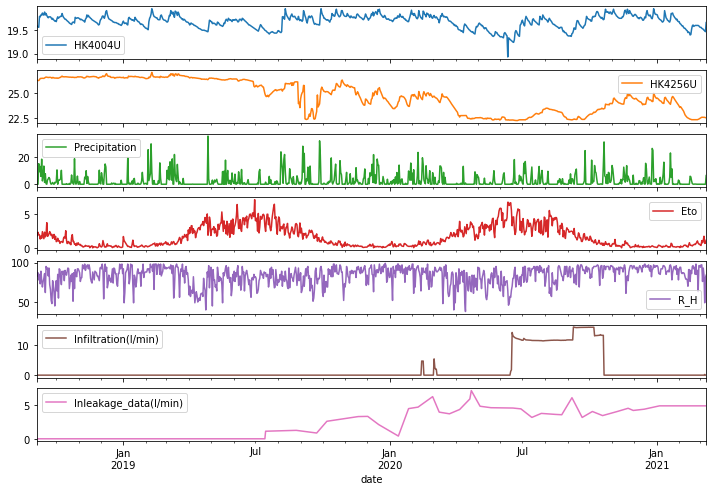

In [6]:
df[['HK4004U','HK4256U','Precipitation','Eto','R_H','Infiltration(l/min)','Inleakage_data(l/min)']].plot(subplots=True) #plotting the time-series for different datasets

Text(0, 0.5, 'GWL(m)')

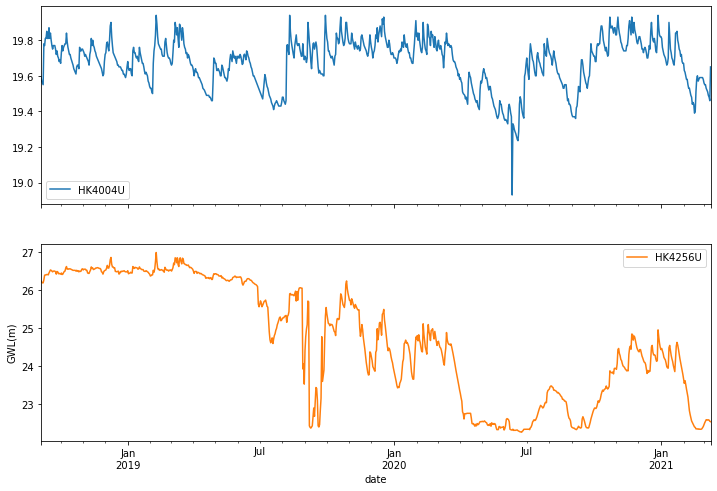

In [7]:
df[['HK4004U','HK4256U']].plot(subplots=True)
#plt.xlabel('GWL(m)')
plt.ylabel('GWL(m)')

In [140]:
df_input =df[['HK4004U','Precipitation','Eto','R_H']]#'Inleakage_data(l/min)','Infiltration(l/min)']]
#df_input= df.fillna({'ET':0})
df_input # selecting which input to use based on the scenario

,HK4004U,Precipitation,Eto,R_H
date,,,,
2018-09-04,19.595,0.0,1.71,89.0
2018-09-05,19.570,0.0,1.80,83.0
2018-09-06,19.560,0.0,2.29,87.0
2018-09-07,19.550,14.9,1.92,78.0
2018-09-08,19.780,9.1,1.90,85.0
...,...,...,...,...
2021-03-06,19.510,0.0,1.13,93.0
2021-03-07,19.490,0.0,1.71,84.0
2021-03-08,19.480,0.0,0.66,49.0


In [141]:
df_input
df_input.describe() # statistical inference on the input data selected

,HK4004U,Precipitation,Eto,R_H
count,919.000000,919.000000,919.000000,919.000000
mean,19.674321,2.701197,1.605892,83.480958
std,0.136781,5.081702,1.519437,11.851726
min,18.930000,0.000000,0.010000,38.000000
25%,19.590000,0.000000,0.330000,77.000000
50%,19.700000,0.100000,0.970000,87.000000
75%,19.770000,3.100000,2.570000,93.000000
max,19.940000,35.000000,7.070000,99.000000


In [142]:
            #df_input.query("Precipitation > 25")

In [143]:
scaler = StandardScaler() # Using Scikit Learn to scale the data. Also, making it an array of vectors  
data_scaled = scaler.fit_transform(df_input)


In [144]:
data_scaled

array([[-0.58022864, -0.53184307,  0.06855461,  0.4659277 ],
       [-0.76310252, -0.53184307,  0.12781932, -0.04060332],
       [-0.83625208, -0.53184307,  0.45048276,  0.29708403],
       ...,
       [-1.4214485 , -0.53184307, -0.62286705, -2.9109458 ],
       [-1.5677476 , -0.53184307, -0.59652718, -0.209447  ],
       [-0.1779061 ,  0.7085742 , -0.31995852,  0.04381852]])

In [145]:
features=data_scaled [:,:]
target=data_scaled [:,0]

In [146]:
TimeseriesGenerator(features,target, length=2,sampling_rate=1, batch_size =1)[0]#length=2

(array([[[-0.58022864, -0.53184307,  0.06855461,  0.4659277 ],
         [-0.76310252, -0.53184307,  0.12781932, -0.04060332]]]),
 array([-0.83625208]))

In [147]:
features=data_scaled [:,1:4] # selecting the features from the dataset
target=data_scaled [:,0] # selecting the target from the dataset 

In [148]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.30,random_state=123, shuffle = False) # splitting the data into training and testing (70/30)
# shuffle = false , is important because it wont randomly shuffle with respect to time and training 80% of the data and not just 20%.

In [149]:
x_train.shape,x_test.shape

((643, 3), (276, 3))

In [150]:
win_length = 14 # defining how many days we use to predict one day ahead
batch_size = 10 # no. of batches used for trainning
num_features = 3  
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length

In [151]:
        train_generator[0]

(array([[[-0.53184307,  0.06855461,  0.4659277 ],
         [-0.53184307,  0.12781932, -0.04060332],
         [-0.53184307,  0.45048276,  0.29708403],
         [ 2.40184221,  0.20683894, -0.46271251],
         [ 1.25987076,  0.193669  ,  0.12824035],
         [ 2.00805895, -0.20142909, -0.8848217 ],
         [ 0.59043922,  0.08172454,  0.4659277 ],
         [ 3.05158459, -0.12899444, -0.54713435],
         [-0.05930316,  0.51633244, -1.22250905],
         [ 0.64950671,  0.18708403, -0.63155618],
         [ 2.06712644, -0.16850425, -0.29386883],
         [-0.27588395,  0.4636527 ,  0.21266219],
         [ 0.96453332,  0.00928989, -1.81346191],
         [-0.47277558,  0.193669  ,  0.97245873]],
 
        [[-0.53184307,  0.12781932, -0.04060332],
         [-0.53184307,  0.45048276,  0.29708403],
         [ 2.40184221,  0.20683894, -0.46271251],
         [ 1.25987076,  0.193669  ,  0.12824035],
         [ 2.00805895, -0.20142909, -0.8848217 ],
         [ 0.59043922,  0.08172454,  0.4659277 

In [152]:
test_generator[0]
                            

(array([[[-0.53184307,  1.6226071 , -0.71597802],
         [-0.53184307,  1.56992735, -0.63155618],
         [-0.53184307,  1.86625092, -0.54713435],
         [-0.53184307,  3.34786876, -1.5601964 ],
         [-0.53184307,  3.32811385, -3.16421131],
         [-0.53184307,  3.03837525, -2.9109458 ],
         [-0.53184307,  3.22275436, -2.2355711 ],
         [-0.53184307,  3.30177398, -2.31999293],
         [-0.43339726,  2.57084251, -1.5601964 ],
         [-0.53184307,  1.08263971, -1.13808721],
         [-0.53184307,  1.89917576, -0.29386883],
         [ 0.43292592,  1.93868557, -0.29386883],
         [ 2.9925171 ,  0.82582595,  0.55034954],
         [-0.43339726,  0.23976378,  0.88803689]],
 
        [[-0.53184307,  1.56992735, -0.63155618],
         [-0.53184307,  1.86625092, -0.54713435],
         [-0.53184307,  3.34786876, -1.5601964 ],
         [-0.53184307,  3.32811385, -3.16421131],
         [-0.53184307,  3.03837525, -2.9109458 ],
         [-0.53184307,  3.22275436, -2.2355711 

In [153]:
# defining the neural network architecture. Using tensorflow and keras we define the no. of layers, no. of hidden units and activataion functions. 
model=tf.keras.Sequential() 
model.add(tf.keras.layers.LSTM(64,input_shape=(win_length,num_features),return_sequences=True)) # return seq, hidden state for all the input sequence. To take each observatuion into account and hence return sequence is true  
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(tf.keras.layers.LSTM(64,return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(32,return_sequences=False)) #returns only one hidden state back
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [154]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 14, 64)            17408     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 64)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 14, 64)            33024     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)               

In [155]:
# compiling the model using early stopping to reduce redundnacy 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience=2,mode='min')
# using the error metrics to evalaute the accuarcy on the test set    
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=50,validation_data =test_generator,
                             shuffle=False, callbacks = [early_stopping])

Epoch 1/50
63/63 [==============================] - 2s 30ms/step - loss: 0.5507 - mean_absolute_error: 0.5911 - val_loss: 0.9123 - val_mean_absolute_error: 0.7672
Epoch 2/50
63/63 [==============================] - 1s 14ms/step - loss: 0.8319 - mean_absolute_error: 0.7316 - val_loss: 0.7566 - val_mean_absolute_error: 0.6721
Epoch 3/50
63/63 [==============================] - 1s 14ms/step - loss: 0.4144 - mean_absolute_error: 0.5137 - val_loss: 0.6246 - val_mean_absolute_error: 0.6374
Epoch 4/50
63/63 [==============================] - 1s 14ms/step - loss: 0.5544 - mean_absolute_error: 0.5807 - val_loss: 0.6393 - val_mean_absolute_error: 0.6056
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3091 - mean_absolute_error: 0.4355 - val_loss: 0.5019 - val_mean_absolute_error: 0.5672
Epoch 6/50
63/63 [==============================] - 1s 14ms/step - loss: 0.4033 - mean_absolute_error: 0.4852 - val_loss: 0.5249 - val_mean_absolute_error: 0.5366
Epoch 7/50
63/63 [====

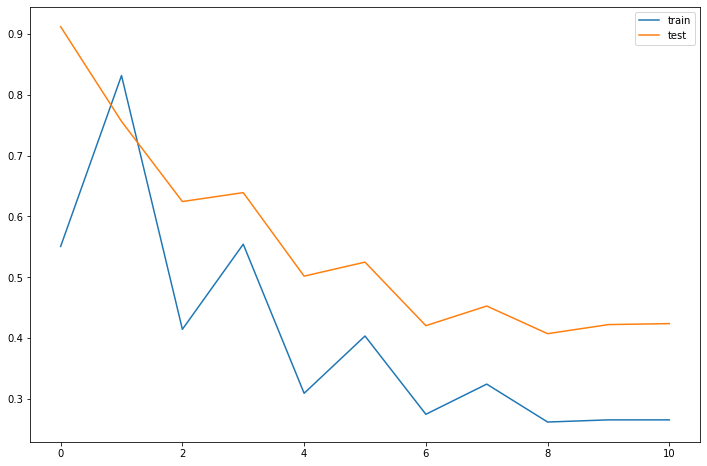

In [157]:
#plotting the learning curve for the test and training losses 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [158]:
#model.evaluate_generator(train_generator,verbose=0)
model.evaluate_generator(test_generator,verbose=0)

[0.4237540662288666, 0.4955459535121918]

In [159]:
#predicting the values
predictions=model.predict_generator(test_generator) # we can use train generator also to check predictions for the training set. 

In [160]:
predictions.shape[0]

262

In [161]:
predictions


array([[-0.5791222 ],
       [-0.39280352],
       [-0.38539633],
       [-0.44547072],
       [-0.5162891 ],
       [-0.5715975 ],
       [-0.5514716 ],
       [-0.46807465],
       [-0.26367423],
       [-0.03573913],
       [ 0.08753675],
       [ 0.07238791],
       [ 0.5114141 ],
       [ 0.52201277],
       [ 1.4281955 ],
       [ 1.4064842 ],
       [ 1.0627091 ],
       [ 0.87056047],
       [ 0.750899  ],
       [ 0.6450982 ],
       [ 0.5074596 ],
       [ 0.38226354],
       [ 0.36921588],
       [ 0.8329225 ],
       [ 0.8523092 ],
       [ 0.73473495],
       [ 0.49891976],
       [ 0.30452672],
       [-0.07058209],
       [-0.3614228 ],
       [-0.39309767],
       [-0.3987515 ],
       [-0.36462283],
       [ 0.26685962],
       [ 0.4943258 ],
       [ 0.5461517 ],
       [ 0.5979448 ],
       [ 0.7429548 ],
       [ 0.76975065],
       [ 0.6787215 ],
       [ 0.5731505 ],
       [ 0.45257956],
       [ 0.33684123],
       [ 0.23571911],
       [ 0.13277547],
       [ 0

In [162]:
y_test


array([-1.86034581, -2.07979447, -2.22609358, -5.4446739 , -2.51869179,
       -2.59184134, -2.75033206, -2.84481685, -2.92406225, -3.04597812,
       -3.15570245, -3.21056462, -2.82652946, -1.71404671, -1.40681859,
       -1.53276302, -1.84510635, -2.06150708, -2.19390777, -2.28400366,
       -0.56803702, -0.43088161, -0.08037339,  0.18784166, -0.1779061 ,
       -0.47050431, -0.68995297,  0.26099122,  0.77303808,  0.55358943,
        0.33414077,  0.11469211,  0.04154256, -0.1779061 , -0.39735476,
       -0.54365386, -0.54365386,  0.26099122,  0.40729032,  0.18784166,
        0.04154256, -0.031607  , -0.1779061 , -0.25105565, -0.39735476,
       -0.47050431, -0.54365386,  0.77303808,  0.48043987,  0.33414077,
        0.26099122,  0.99248674,  0.77303808,  0.55358943,  0.40729032,
        0.33414077,  0.26099122,  0.11469211, -0.10475655,  0.18784166,
        0.48043987,  0.26099122,  0.11469211, -0.031607  , -0.25105565,
       -0.39735476, -0.47050431, -0.47050431, -0.61680342, -0.68

In [163]:
x_test 

array([[-5.31843070e-01,  1.62260710e+00, -7.15978021e-01],
       [-5.31843070e-01,  1.56992735e+00, -6.31556184e-01],
       [-5.31843070e-01,  1.86625092e+00, -5.47134346e-01],
       [-5.31843070e-01,  3.34786876e+00, -1.56019640e+00],
       [-5.31843070e-01,  3.32811385e+00, -3.16421131e+00],
       [-5.31843070e-01,  3.03837525e+00, -2.91094580e+00],
       [-5.31843070e-01,  3.22275436e+00, -2.23557110e+00],
       [-5.31843070e-01,  3.30177398e+00, -2.31999293e+00],
       [-4.33397255e-01,  2.57084251e+00, -1.56019640e+00],
       [-5.31843070e-01,  1.08263971e+00, -1.13808721e+00],
       [-5.31843070e-01,  1.89917576e+00, -2.93868834e-01],
       [ 4.32925915e-01,  1.93868557e+00, -2.93868834e-01],
       [ 2.99251710e+00,  8.25825946e-01,  5.50349541e-01],
       [-4.33397255e-01,  2.39763779e-01,  8.88036891e-01],
       [-1.97127300e-01,  5.03162506e-01, -1.22250905e+00],
       [-5.31843070e-01,  1.95844047e+00, -3.78290671e-01],
       [-5.31843070e-01,  2.37329347e+00

In [164]:
 x_test[:,0:][win_length:] # removing the window length from the testset

array([[-1.97127300e-01,  5.03162506e-01, -1.22250905e+00],
       [-5.31843070e-01,  1.95844047e+00, -3.78290671e-01],
       [-5.31843070e-01,  2.37329347e+00,  4.38185163e-02],
       [-5.31843070e-01,  2.70912684e+00, -3.78290671e-01],
       [-3.34951441e-01,  2.55108761e+00, -9.69243534e-01],
       [ 7.47952523e-01,  2.63010723e+00, -8.84821696e-01],
       [-3.96139960e-02,  6.34861869e-01, -1.25025159e-01],
       [ 5.51060893e-01,  1.50407767e+00, -1.13808721e+00],
       [ 1.17899308e-01,  4.24142888e-01,  4.38185163e-02],
       [-3.74329767e-01,  1.25384888e+00,  4.38185163e-02],
       [-5.31843070e-01,  1.77406136e+00,  8.88036891e-01],
       [ 2.46090970e+00,  8.06071042e-01, -7.15978021e-01],
       [ 9.84222478e-01,  2.06838938e-01,  9.72458729e-01],
       [ 2.71686882e+00,  5.16332442e-01,  9.72458729e-01],
       [ 1.04328997e+00,  5.09747474e-01, -4.62712509e-01],
       [-2.75883952e-01,  1.00362009e+00, -7.15978021e-01],
       [-5.31843070e-01,  1.67528684e+00

In [165]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,0:][win_length:])],axis=1) #attaching the predictions dataframe with test set

In [166]:
df_pred

,0,0,1,2
0,-0.579122,-0.197127,0.503163,-1.222509
1,-0.392804,-0.531843,1.958440,-0.378291
2,-0.385396,-0.531843,2.373293,0.043819
3,-0.445471,-0.531843,2.709127,-0.378291
4,-0.516289,-0.334951,2.551088,-0.969244
...,...,...,...,...
257,-0.328548,-0.531843,-0.313374,0.803615
258,-0.349657,-0.531843,0.068555,0.043819
259,-0.374556,-0.531843,-0.622867,-2.910946
260,-0.405073,-0.531843,-0.596527,-0.209447


In [167]:
rev_trans=scaler.inverse_transform(df_pred) # using the inverse transform function to trasnform the data into its original state

In [168]:
df_pred

,0,0,1,2
0,-0.579122,-0.197127,0.503163,-1.222509
1,-0.392804,-0.531843,1.958440,-0.378291
2,-0.385396,-0.531843,2.373293,0.043819
3,-0.445471,-0.531843,2.709127,-0.378291
4,-0.516289,-0.334951,2.551088,-0.969244
...,...,...,...,...
257,-0.328548,-0.531843,-0.313374,0.803615
258,-0.349657,-0.531843,0.068555,0.043819
259,-0.374556,-0.531843,-0.622867,-2.910946
260,-0.405073,-0.531843,-0.596527,-0.209447


In [169]:
rev_trans

array([[19.59515126,  1.7       ,  2.37      , 69.        ],
       [19.62062218,  0.        ,  4.58      , 79.        ],
       [19.62163479,  0.        ,  5.21      , 84.        ],
       ...,
       [19.6231167 ,  0.        ,  0.66      , 49.        ],
       [19.61894489,  0.        ,  0.7       , 81.        ],
       [19.61653996,  6.3       ,  1.12      , 84.        ]])

In [170]:
df_final=rev_trans[:,:]
df_final

array([[19.59515126,  1.7       ,  2.37      , 69.        ],
       [19.62062218,  0.        ,  4.58      , 79.        ],
       [19.62163479,  0.        ,  5.21      , 84.        ],
       ...,
       [19.6231167 ,  0.        ,  0.66      , 49.        ],
       [19.61894489,  0.        ,  0.7       , 81.        ],
       [19.61653996,  6.3       ,  1.12      , 84.        ]])

In [171]:
df_final=(df_input[predictions.shape[0]*-1:]) # using the original test set and creating a dataframe

In [172]:
df_final.count()

HK4004U          262
Precipitation    262
Eto              262
R_H              262
dtype: int64

In [174]:
#attaching the predicted GWL to the df_final dataset 
df_final['HK4004U_pred']=rev_trans[:,0]


<ipython-input-174-e4f3a0fdecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HK4004U_pred']=rev_trans[:,0]


In [175]:
    df_final
#df_final.to_csv("Copythecsv.csv")

,HK4004U,Precipitation,Eto,R_H,HK4256U_pred,HK4004U_pred
date,,,,,,
2020-06-22,19.482000,1.7,2.37,69.0,19.595151,19.595151
2020-06-23,19.464783,0.0,4.58,79.0,19.620622,19.620622
2020-06-24,19.422083,0.0,5.21,84.0,19.621635,19.621635
2020-06-25,19.392500,0.0,5.72,79.0,19.613422,19.613422
2020-06-26,19.374400,1.0,5.48,72.0,19.603741,19.603741
...,...,...,...,...,...,...
2021-03-06,19.510000,0.0,1.13,93.0,19.629406,19.629406
2021-03-07,19.490000,0.0,1.71,84.0,19.626521,19.626521
2021-03-08,19.480000,0.0,0.66,49.0,19.623117,19.623117


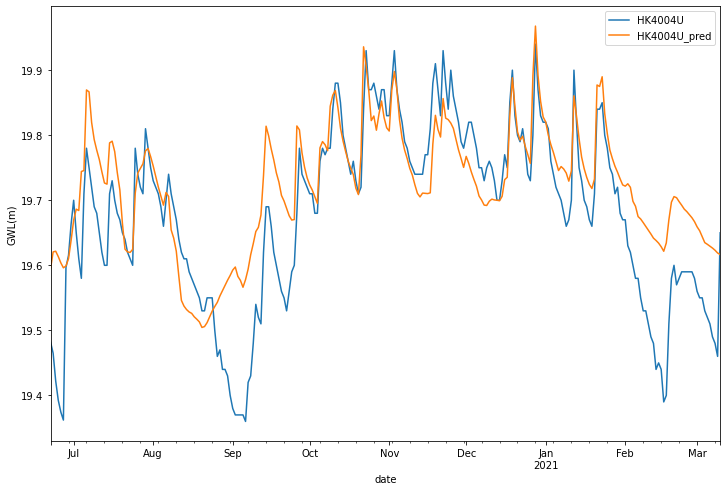

In [176]:
#Plotting the predictions and original data
df_final[['HK4004U','HK4004U_pred']].plot()
plt.ylabel('GWL(m)')
plt.savefig("HK4004U,HK4004U_pred")

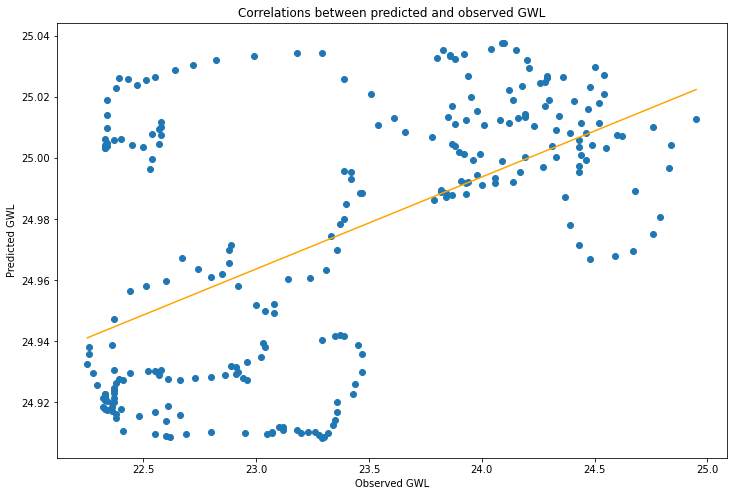

<Figure size 864x576 with 0 Axes>

In [130]:
#Evaluating the correlation coefficient using the numpy function between the observed and predicted GWL 
x =df_final['HK4256U']
y= df_final['HK4256U_pred']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.title('Correlations between predicted and observed GWL')
plt.xlabel('Observed GWL')
plt.ylabel('Predicted GWL')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color="orange")
plt.show()
plt.savefig("R1_CORR.png")

In [43]:
#Evaluating the coefficient of determination
x_values = df_final['HK4256U']
y_values = df_final['HK4256U_pred']
    
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.32096808195206955


In [ ]:
# Using packages to determine the inference on the predictions
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
#from kerashypetune import KerasGridSearch

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [178]:
#defining functions for gradient importance
def gradient_importance(seq, model):
    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)
    with tf.GradientTape() as tape:
        predictions = model(seq)
    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads
def activation_grad(seq, model): # the activation grid is not detemined for this particular prokect
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap


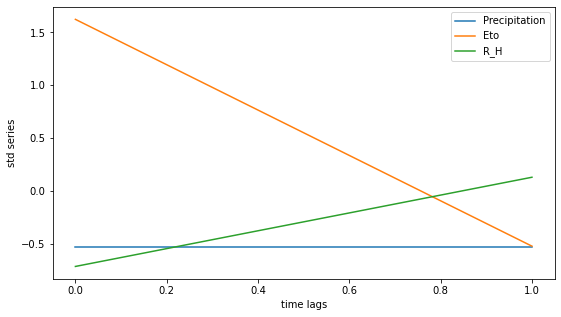

In [179]:
# Determing the time lags of the features
id_ = [0,262]
plt.figure(figsize=(9,5))
plt.plot(x_test[id_])
plt.ylabel('std series'); plt.xlabel('time lags'); plt.legend(columns)
plt.show()

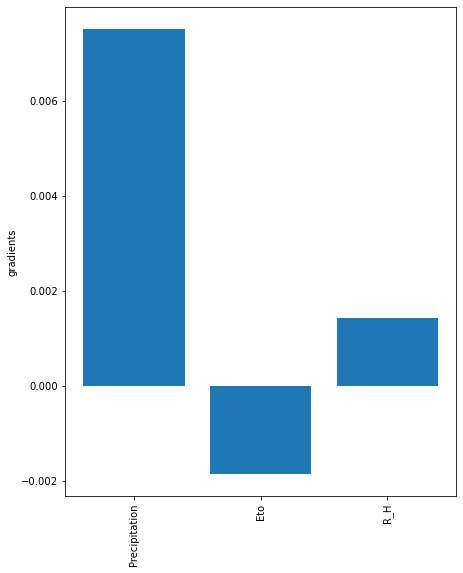

<Figure size 864x576 with 0 Axes>

In [180]:
#Determining the average gradients of the features contributing for predicting the GWL one day ahead .

columns = ['Precipitation','Eto','R_H'] #'Infiltration(l/min)', 'Inleakage(l/min)']#'Infiltration(l/min)','Inleakage_data(l/min)']
#win_length = 1
grad_imp = gradient_importance(x_test, model)
plt.figure(figsize=(7,9))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title((tes))
plt.show()
plt.savefig('R2_WGradient.png')

In [529]:
#Examining the pearson correlation coefficient of the entire dataset to account for linearity. 
df_new = df_final.corr(method='pearson')
df_new

,HK4256U,Precipitation,Eto,R_H,Inleakage_data(l/min),Infiltration(l/min),HK4256U_pred
HK4256U,1.000000,0.053181,-0.518219,0.235258,0.055674,-0.622690,0.921115
Precipitation,0.053181,1.000000,-0.107120,0.063105,-0.050143,-0.020451,0.103606
Eto,-0.518219,-0.107120,1.000000,-0.409106,-0.385034,0.683944,-0.644112
R_H,0.235258,0.063105,-0.409106,1.000000,-0.003589,-0.199078,0.344228
Inleakage_data(l/min),0.055674,-0.050143,-0.385034,-0.003589,1.000000,-0.476929,-0.009937
Infiltration(l/min),-0.622690,-0.020451,0.683944,-0.199078,-0.476929,1.000000,-0.564419
HK4256U_pred,0.921115,0.103606,-0.644112,0.344228,-0.009937,-0.564419,1.000000
